## Nicolas Leguizamón, código: 201727960
## Leidy Araque Molina código: 201727196

# Exercise 04

# Fraud Detection

## Introduction

- Fraud Detection Dataset from Microsoft Azure: [data](http://gallery.cortanaintelligence.com/Experiment/8e9fe4e03b8b4c65b9ca947c72b8e463)

Fraud detection is one of the earliest industrial applications of data mining and machine learning. Fraud detection is typically handled as a binary classification problem, but the class population is unbalanced because instances of fraud are usually very rare compared to the overall volume of transactions. Moreover, when fraudulent transactions are discovered, the business typically takes measures to block the accounts from transacting to prevent further losses. 

In [8]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [9]:
import zipfile
with zipfile.ZipFile('../datasets/fraud_detection.csv.zip', 'r') as z:
    f = z.open('15_fraud_detection.csv')
    data = pd.io.parsers.read_table(f, index_col=0, sep=',')

In [10]:
data.head()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0,Label
0,2000,0,0,0.00,720.25,5.064533,0.421214,1.312186,0.566395,3279.574306,1.218157,599.00,626.164650,1.259543,4.745402,0
1,62,1,1,1185.44,2530.37,0.538996,0.481838,4.401370,4.500157,61.970139,4.035601,1185.44,1185.440000,3.981118,4.921349,0
2,2000,0,0,0.00,0.00,5.064533,5.096396,3.056357,3.155226,0.000000,3.314186,32.09,32.090000,5.008490,4.742303,0
3,1,1,0,0.00,0.00,5.064533,5.096396,3.331154,3.331239,0.000000,3.529398,133.28,132.729554,1.324925,4.745402,0
4,1,1,0,0.00,132.73,5.412885,0.342945,5.563677,4.086965,0.001389,3.529398,543.66,543.660000,2.693451,4.876771,0


In [11]:
data.shape, data.Label.sum(), data.Label.mean()

((138721, 16), 797, 0.0057453449730033666)

In [12]:
X = data.drop(['Label'], axis=1)
y = data['Label']

# Exercice 04.1

Estimate a Logistic Regression

Evaluate using the following metrics:
* Accuracy
* F1-Score
* F_Beta-Score (Beta=10)

Comment about the results

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score

logreg = LogisticRegression(C=1e9) # entre mas pequeño es este parámetro entonces hay menor overfitting

results = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')

C:\Users\laraquem\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
pd.Series(results).describe()

count    10.000000
mean      0.994247
std       0.000045
min       0.994161
25%       0.994233
50%       0.994233
75%       0.994287
max       0.994305
dtype: float64

In [15]:
from sklearn.cross_validation import train_test_split
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

# train a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)

# make predictions for testing set
y_pred_class = logreg.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_class)

array([[34477,     0],
       [  204,     0]], dtype=int64)

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('precision_score ', precision_score(y_test, y_pred_class))
print('recall_score    ', recall_score(y_test, y_pred_class))

precision_score  0.0
recall_score     0.0


C:\Users\laraquem\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [18]:
print('f1_score    ', f1_score(y_test, y_pred_class))

f1_score     0.0


C:\Users\laraquem\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


En el codigo anterior vemos que como el score clasifica mal, esta medida f1 no se puede calcular

Ademas en clase se dijo que no se debia calcular la medida F_Beta

# Exercice 04.2

Under-sample the negative class using random-under-sampling

Which is parameter for target_percentage did you choose?
How the results change?

**Only apply under-sampling to the training set, evaluate using the whole test set**

In [19]:
# no se debe realizar el undersample para cada kfold, por ahora solo en el train 
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [20]:
n_samples = y_train.shape[0]
print(n_samples)

104040


In [21]:
n_samples_0 = (y_train == 0).sum()
n_samples_0

103452

In [22]:
n_samples_1 = (y_train == 1).sum()
n_samples_1

588

In [23]:
n_samples_1 / n_samples

0.0056516724336793545

Para ver gráficamente lo que ocurre debemos usar componentes principales asi:

In [24]:
from sklearn.decomposition import PCA
plt.style.use('ggplot')

pca = PCA(n_components = 2)

# Fit and transform x to visualise inside a 2D feature space
X_train_vis = pca.fit_transform(X_train)

In [25]:
def plot_two_classes(X, y, subplot=False, size=(10, 10)):
    # Plot the two classes
    if subplot == False:
        fig, subplot = plt.subplots(nrows=1, ncols=1, figsize=size)
        
    subplot.scatter(X[y==0, 0], X[y==0, 1], label="Class #0", 
                    alpha=0.5, s=70)
    subplot.scatter(X[y==1, 0], X[y==1, 1], label="Class #1", 
                    alpha=0.5, s=70)
    subplot.legend()
    return subplot

In [26]:
def UnderSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_0_new =  n_samples_1 / target_percentage - n_samples_1
    n_samples_0_new_per = n_samples_0_new / n_samples_0

    filter_ = y == 0

    np.random.seed(seed)
    rand_1 = np.random.binomial(n=1, p=n_samples_0_new_per, size=n_samples)
    
    filter_ = filter_ & rand_1
    filter_ = filter_ | (y == 1)
    filter_ = filter_.astype(bool)
    
    return X[filter_], y[filter_]

Target percentage 0.1
y.shape =  5867 y.mean() =  0.10022157831941367


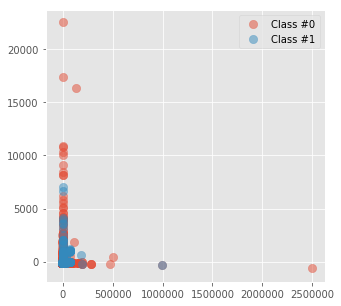

Target percentage 0.2
y.shape =  2939 y.mean() =  0.20006805035726438


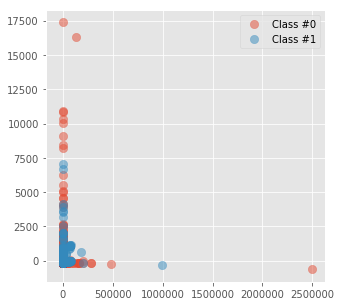

Target percentage 0.3
y.shape =  1920 y.mean() =  0.30625


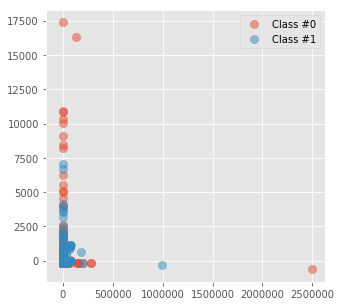

Target percentage 0.4
y.shape =  1430 y.mean() =  0.4111888111888112


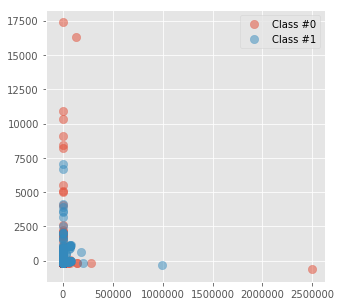

Target percentage 0.5
y.shape =  1151 y.mean() =  0.5108601216333623


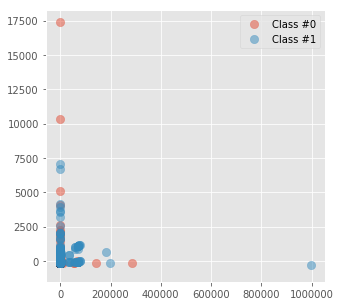

In [27]:
for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5]:
    X_u, y_u = UnderSampling(X_train_vis, y_train, target_percentage, 1)
    print('Target percentage', target_percentage)
    print('y.shape = ',y_u.shape[0], 'y.mean() = ', y_u.mean())
    plot_two_classes(X_u, y_u, size=(5, 5))
    plt.show()  

Ahora a variamos el parámetro target_percent y calculamos el auc y el accuracy para cada iteración

In [28]:
for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5]:
    X_u, y_u = UnderSampling(X_train, y_train, target_percentage, 1)
    logreg = LogisticRegression(C=1e9)
    logreg.fit(X_u, y_u)
    y_pred_class=logreg.predict(X_test)
    print('Target percentage', target_percentage)
    print('y.shape = ',y_u.shape[0], 'y.mean() = ', y_u.mean())
    print('AUC = ',metrics.roc_auc_score(y_test, y_pred_class))
    print('Aaccuracy = ',metrics.accuracy_score(y_test, y_pred_class))


Target percentage 0.1
y.shape =  5867 y.mean() =  0.10022157831941367
AUC =  0.4999854954745881
Aaccuracy =  0.9939448112799516
Target percentage 0.2
y.shape =  2939 y.mean() =  0.20006805035726438
AUC =  0.5128601008682172
Aaccuracy =  0.9911767250079294
Target percentage 0.3
y.shape =  1920 y.mean() =  0.30625
AUC =  0.574430145650419
Aaccuracy =  0.9528560306796229
Target percentage 0.4
y.shape =  1430 y.mean() =  0.4111888111888112
AUC =  0.6142470804958132
Aaccuracy =  0.8145670540065165
Target percentage 0.5
y.shape =  1151 y.mean() =  0.5108601216333623
AUC =  0.6565498411580968
Aaccuracy =  0.5583172342204665


Como podemos ver a medida que aumentamos el porcentaje de datos que queremos de la categoria 1 el AUC aumenta y el accuracy disminuye por lo que para este caso el que mejor metricas nos da en ambas medidas es target percentage = 0.4

# Exercice 04.3

Now using random-over-sampling

In [48]:
import random
def OverSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_1_new =  -target_percentage * n_samples_0 / (target_percentage- 1)

    np.random.seed(seed)
    filter_ = np.random.choice(X[y == 1].shape[0], int(n_samples_1_new))
    # filter_ is within the positives, change to be of all
    filter_ = np.nonzero(y == 1)[0][filter_]
    
    filter_ = np.concatenate((filter_, np.nonzero(y == 0)[0]), axis=0)
    
    return X[filter_], y[filter_]

C:\Users\AsusPC\Anaconda3\lib\site-packages\pandas\core\series.py:696: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


Target percentage 0.1
y.shape =  114946 y.mean() =  0.005568225229501175


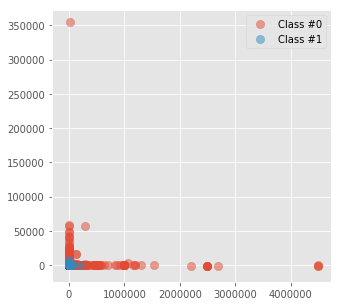

Target percentage 0.2
y.shape =  129315 y.mean() =  0.0053885393466011145


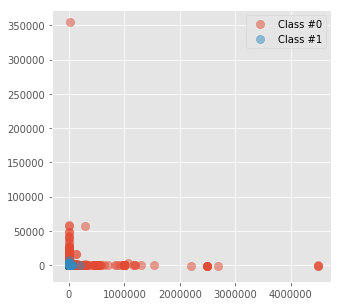

Target percentage 0.3
y.shape =  147788 y.mean() =  0.0051635574759527035


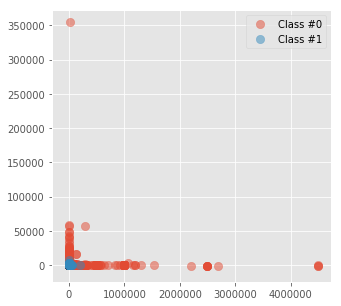

Target percentage 0.4
y.shape =  172420 y.mean() =  0.005034342504124938


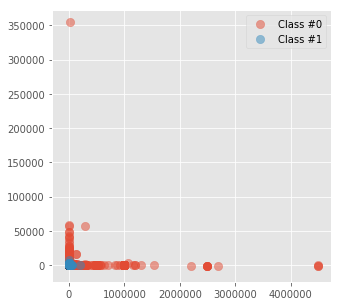

Target percentage 0.5
y.shape =  206904 y.mean() =  0.004769738939689585


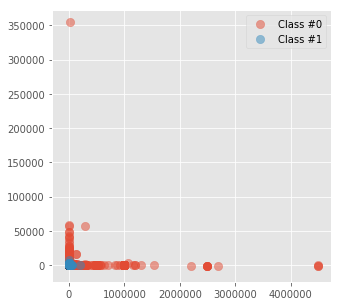

In [49]:
for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5]:
    X_u, y_u = OverSampling(X_train_vis, y_train, target_percentage, 1)
    print('Target percentage', target_percentage)
    print('y.shape = ',y_u.shape[0], 'y.mean() = ', y_u.mean())
    plot_two_classes(X_u, y_u, size=(5, 5))
    plt.show()
    
    
    

In [52]:
for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5]:
    X_u, y_u = OverSampling(X_train_vis, y_train, target_percentage, 1)


C:\Users\AsusPC\Anaconda3\lib\site-packages\pandas\core\series.py:696: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


In [53]:
X_train_vis

array([[-2195.05093259,  -118.25153192],
       [-2230.89180094,  -122.75742487],
       [-2247.08359856,    -2.863442  ],
       ...,
       [-2340.23710144,   -85.4575715 ],
       [-2201.35460924,  -119.04393818],
       [-2185.01547103,  -117.07292273]])

# Exercice 04.4*
Evaluate the results using SMOTE

Which parameters did you choose?

# Exercice 04.5

Estimate a Logistic Regression, GaussianNB, K-nearest neighbors and a Decision Tree **Classifiers**

Evaluate using the following metrics:
* Accuracy
* F1-Score
* F_Beta-Score (Beta=10)

Comment about the results

Combine the classifiers and comment

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

** LogisticRegression **

In [30]:
from sklearn.cross_validation import cross_val_score

logreg = LogisticRegression(C=1e9) # entre mas pequeño es este parámetro entonces hay menor overfitting

results_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
results_acc = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
#results_f1 = cross_val_score(logreg, X, y, cv=10, scoring='f1')

In [31]:
pd.Series(results_auc).describe()

count    10.000000
mean      0.480988
std       0.093448
min       0.310725
25%       0.440481
50%       0.489745
75%       0.516767
max       0.646547
dtype: float64

In [32]:
pd.Series(results_acc).describe()

count    10.000000
mean      0.994247
std       0.000045
min       0.994161
25%       0.994233
50%       0.994233
75%       0.994287
max       0.994305
dtype: float64

F1 como ya habiamos visto no se puede calcular

** GaussianNB **

In [33]:
GaussNB =  GaussianNB()

nb_results_auc = cross_val_score(GaussNB, X, y, cv=10, scoring='roc_auc')
nb_results_acc = cross_val_score(GaussNB, X, y, cv=10, scoring='accuracy')
nb_results_f1 = cross_val_score(GaussNB, X, y, cv=10, scoring='f1')

C:\Users\laraquem\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [34]:
pd.Series(nb_results_auc).describe()

count    10.000000
mean      0.635844
std       0.103865
min       0.435019
25%       0.556074
50%       0.687934
75%       0.705170
max       0.764893
dtype: float64

In [35]:
pd.Series(nb_results_acc).describe()

count    10.000000
mean      0.914317
std       0.251072
min       0.199755
25%       0.993080
50%       0.993945
75%       0.994125
max       0.994233
dtype: float64

In [110]:
pd.Series(nb_results_f1).describe()

count    10.000000
mean      0.003014
std       0.007089
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       0.021739
dtype: float64

** K-nearest neighbors **

In [36]:
KNeighbors = KNeighborsClassifier()

kn_results_auc = cross_val_score(KNeighbors, X, y, cv=10, scoring='roc_auc')
kn_results_acc = cross_val_score(KNeighbors, X, y, cv=10, scoring='accuracy')
kn_results_f1 = cross_val_score(KNeighbors, X, y, cv=10, scoring='f1')

In [37]:
pd.Series(kn_results_auc).describe()

count    10.000000
mean      0.600404
std       0.037367
min       0.542174
25%       0.575141
50%       0.597075
75%       0.624150
max       0.666087
dtype: float64

In [38]:
pd.Series(kn_results_acc).describe()

count    10.000000
mean      0.994017
std       0.000467
min       0.993008
25%       0.993890
50%       0.994017
75%       0.994359
max       0.994522
dtype: float64

In [39]:
pd.Series(kn_results_f1).describe()

count    10.000000
mean      0.090586
std       0.035755
min       0.021978
25%       0.075311
50%       0.100811
75%       0.111444
max       0.141593
dtype: float64

** Decision Tree Classifiers **

In [40]:
DecisionTree = DecisionTreeClassifier(random_state=0)

dt_results_auc = cross_val_score(DecisionTree, X, y, cv=10, scoring='roc_auc')
dt_results_acc = cross_val_score(DecisionTree, X, y, cv=10, scoring='accuracy')
dt_results_f1 = cross_val_score(DecisionTree, X, y, cv=10, scoring='f1')

In [41]:
pd.Series(dt_results_auc).describe()

count    10.000000
mean      0.567152
std       0.019757
min       0.521381
25%       0.560568
50%       0.572215
75%       0.576725
max       0.596476
dtype: float64

In [42]:
pd.Series(dt_results_acc).describe()

count    10.000000
mean      0.988416
std       0.002656
min       0.981979
25%       0.987636
50%       0.989079
75%       0.990268
max       0.990917
dtype: float64

In [43]:
pd.Series(dt_results_f1).describe()

count    10.000000
mean      0.125101
std       0.037581
min       0.043716
25%       0.103935
50%       0.137701
75%       0.146836
max       0.175824
dtype: float64

Vemos que el accuracy no se ve muy afectado con el cambio de modelos, aunque en este caso quisimos calcular la medida adicinal del auc ya que se tienen muestras inbalanceadas, en esta medida si vemos que la mejor metodología corresponde con GaussianNB

** Combinación de los Clasificadores **

In [112]:
# read in and prepare the vehicle training data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [113]:
models = {'lr': LogisticRegression(C=1e9),
          'nb': GaussianNB(),
          'kn': KNeighborsClassifier(),
          'dt': DecisionTreeClassifier(random_state=0)}

In [114]:
for model in models.keys():
    models[model].fit(X_train, y_train)

In [115]:
# predict test for each model
y_pred = pd.DataFrame(index=y_test.index, columns=models.keys())
for model in models.keys():
    y_pred[model] = models[model].predict(X_test)

In [117]:
for model in models.keys():
    print('AUC')
    print(model,metrics.roc_auc_score(y_test, y_pred[model]))
    print('Accuracy')
    print(model,metrics.accuracy_score(y_test, y_pred[model]))

AUC
lr 0.5
Accuracy
lr 0.9939736455119518
AUC
nb 0.49869459271292643
Accuracy
nb 0.9913785646319311
AUC
kn 0.5426850832962277
Accuracy
kn 0.9937429716559499
AUC
dt 0.573697632417295
Accuracy
dt 0.9892159972319138


In [118]:
y_pred_max=y_pred.max(axis=1)


In [120]:
metrics.roc_auc_score(y_test, y_pred_max)

0.5865142197092765

In [119]:
metrics.accuracy_score(y_test, y_pred_max)

0.9863325740318907

Vemos que el ensamblaje es mejor que cada uno de los modelos por separado

# Exercice 04.6

Using the under-sampled dataset

Evaluate a RandomForestClassifier and compare the results

change n_estimators=100, what happened

In [97]:
X_u, y_u = UnderSampling(X_train, y_train, 0.4, 1)

In [98]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(X_u, y_u)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [99]:
y_pred=rfc.predict(X_test)

In [100]:
metrics.roc_auc_score(y_test, y_pred)

0.6207785585083407

In [101]:
metrics.accuracy_score(y_test, y_pred)

0.9268187191834145

In [102]:
metrics.f1_score(y_test, y_pred)

0.0487256371814093

Cambiando el parámetro n_estimators=100 obtenemos

In [103]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=2, random_state=0, n_estimators=100)
rfc.fit(X_u, y_u)
y_pred_100=rfc.predict(X_test)

In [104]:
metrics.roc_auc_score(y_test, y_pred_100)

0.6306842471693275

In [105]:
metrics.accuracy_score(y_test, y_pred_100)

0.9417836855915342

In [106]:
metrics.f1_score(y_test, y_pred_100)

0.0613668061366806

Los modelos mejoran al ajustar el parámetro n_estimators